## Getting The Data

Text file already available locally, so jump to the next step.

In [47]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

f = open("chile_ley.txt")    # open "input.txt" file

str=f.read() #read first 10 bytes from the file.
#print(str)     #print first 10 bytes from the file.

#f.close()

pickle.dump(str, open( "save.pkl", "wb" ) )




In [48]:
# GN - test loading. It returns something so means that the file in not empty 
dict = pickle.load( open( "save.pkl", "rb" ) )


In [49]:
# GN - convert into dictionary. need that when working with multiple files 
data = {1: dict}
print(data)


{1: 'ley recuperacion bosque nativo fomento forestal reglamentos ley recuperacion bosque nativo fomento forestal reglamentos ley num\n20283 indice ley recuperacion bosque nativo fomento forestal 8 reglamento ley recuperacion bosque nativo fomento forestal34 reglamento fondo conservacion recuperacion manejo sustentable bosque nativo58 reglamenta recursos destinados investigacion bosque nativo 72 reglamento suelos agua humedales78 reglamento consejo consultivo bosque nativo86 prologo tiempos antiguos naturaleza especial bosque nativo trecha relacion humano supervivencia\nbosque importante fuente productora agua vida oxigeno respiracion ofrece frutos cobija fauna alimenta permite mejorar salud contacto momentos recreacion descanso\nreciente bosque nativo objeto fuerte presion antropica llevado limites supervivencia\nextensiones terrenos habilitados agricultura ganaderia incendios quemas inadecuadas practicas silvoagropecuarias avance ciudades consecuente aumento demanda combustible afecta

In [50]:
# Some checks
data[1][:3]

'ley'

## Cleaning The Data

In [51]:
# check
next(iter(data.keys()))


1

In [52]:
# dictionary is currently in key: policy, value: list of text format
next(iter(data.values()))

'ley recuperacion bosque nativo fomento forestal reglamentos ley recuperacion bosque nativo fomento forestal reglamentos ley num\n20283 indice ley recuperacion bosque nativo fomento forestal 8 reglamento ley recuperacion bosque nativo fomento forestal34 reglamento fondo conservacion recuperacion manejo sustentable bosque nativo58 reglamenta recursos destinados investigacion bosque nativo 72 reglamento suelos agua humedales78 reglamento consejo consultivo bosque nativo86 prologo tiempos antiguos naturaleza especial bosque nativo trecha relacion humano supervivencia\nbosque importante fuente productora agua vida oxigeno respiracion ofrece frutos cobija fauna alimenta permite mejorar salud contacto momentos recreacion descanso\nreciente bosque nativo objeto fuerte presion antropica llevado limites supervivencia\nextensiones terrenos habilitados agricultura ganaderia incendios quemas inadecuadas practicas silvoagropecuarias avance ciudades consecuente aumento demanda combustible afectado i

In [53]:
# change this to key: policy, value: string format
# GN: important not to put space ' ', as delimits the words into letters
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ''.join(list_of_text)
    return combined_text

In [54]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}
print(data_combined)

{1: ['ley recuperacion bosque nativo fomento forestal reglamentos ley recuperacion bosque nativo fomento forestal reglamentos ley num\n20283 indice ley recuperacion bosque nativo fomento forestal 8 reglamento ley recuperacion bosque nativo fomento forestal34 reglamento fondo conservacion recuperacion manejo sustentable bosque nativo58 reglamenta recursos destinados investigacion bosque nativo 72 reglamento suelos agua humedales78 reglamento consejo consultivo bosque nativo86 prologo tiempos antiguos naturaleza especial bosque nativo trecha relacion humano supervivencia\nbosque importante fuente productora agua vida oxigeno respiracion ofrece frutos cobija fauna alimenta permite mejorar salud contacto momentos recreacion descanso\nreciente bosque nativo objeto fuerte presion antropica llevado limites supervivencia\nextensiones terrenos habilitados agricultura ganaderia incendios quemas inadecuadas practicas silvoagropecuarias avance ciudades consecuente aumento demanda combustible afect

In [55]:
# put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
1,ley recuperacion bosque nativo fomento forestal reglamentos ley recuperacion bosque nativo fomento forestal reglamentos ley num\n20283 indice ley ...


In [56]:
# convert lower case 
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()

    return text

round1 = lambda x: clean_text_round1(x)

In [57]:
# check
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
1,ley recuperacion bosque nativo fomento forestal reglamentos ley recuperacion bosque nativo fomento forestal reglamentos ley num\n20283 indice ley ...


In [58]:
# Apply cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [59]:
# updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
1,ley recuperacion bosque nativo fomento forestal reglamentos ley recuperacion bosque nativo fomento forestal reglamentos ley num20283 indice ley re...


## Organizing The Data

### Corpus

In [60]:
# Let's add the full names as well
full_names = ['chile_ley']

data_df['full_name'] = full_names
data_df

,transcript,full_name
1,ley recuperacion bosque nativo fomento forestal reglamentos ley recuperacion bosque nativo fomento forestal reglamentos ley num\n20283 indice ley ...,chile_ley


In [61]:
# pickle it for later use
data_df.to_pickle("chile_ley_corpus.pkl")

### Document-Term Matrix

In [62]:
# create a document-term matrix using CountVectorizer, and exclude common English stop words
# Need to check how to import the spanish stop words list

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,008,014,02,03,05,10,100,100articulo,10o,11,...,zando,zanjas,zar,zara,zare,zo,zona,zonas,zontal,zonte
1,1,1,1,1,6,24,4,1,1,5,...,1,2,2,1,1,2,20,8,1,2


In [63]:
#  pickle it for later use
data_dtm.to_pickle("chile_ley_dtm.pkl")

In [64]:
# pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('chile_ley_data_clean.pkl')
pickle.dump(cv, open("chile_ley_cv.pkl", "wb"))

Start EDA 

In [65]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('chile_ley_dtm.pkl')
data = data.transpose()
data.head()

,1
008,1
014,1
02,1
03,1
05,6


In [66]:
# Find the top 30 words said in each doc
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(50)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{1: [('articulo', 248),
  ('ley', 242),
  ('bosque', 193),
  ('manejo', 189),
  ('plan', 167),
  ('nativo', 154),
  ('corporacion', 148),
  ('debera', 129),
  ('reglamento', 117),
  ('ndeg', 112),
  ('forestal', 112),
  ('agricultura', 103),
  ('corta', 93),
  ('cion', 80),
  ('actividades', 78),
  ('podra', 78),
  ('26', 69),
  ('inciso', 66),
  ('recuperacion', 64),
  ('deberan', 64),
  ('letra', 62),
  ('proteccion', 62),
  ('1deg', 60),
  ('do10032012', 57),
  ('forestales', 54),
  ('fomento', 53),
  ('especies', 52),
  ('planes', 52),
  ('predio', 50),
  ('interesado', 50),
  ('fondo', 46),
  ('siguientes', 44),
  ('recursos', 44),
  ('refiere', 44),
  ('conservacion', 44),
  ('publicado', 44),
  ('ministerio', 43),
  ('plazo', 43),
  ('agua', 42),
  ('ejecucion', 41),
  ('fecha', 41),
  ('tales', 40),
  ('establecido', 39),
  ('suelos', 39),
  ('decreto', 38),
  ('bosques', 38),
  ('nativos', 38),
  ('caso', 38),
  ('superficie', 37),
  ('normas', 37)]}

In [67]:
# Print the top 15 words said by each policy
for policy, top_words in top_dict.items():
    print(policy)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

1
articulo, ley, bosque, manejo, plan, nativo, corporacion, debera, reglamento, ndeg, forestal, agricultura, corta, cion
---


In [68]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each policy
words = []
for doc in data.columns:
    top = [word for (word, count) in top_dict[policy]]
    for t in top:
        words.append(t)
        
words

['articulo',
 'ley',
 'bosque',
 'manejo',
 'plan',
 'nativo',
 'corporacion',
 'debera',
 'reglamento',
 'ndeg',
 'forestal',
 'agricultura',
 'corta',
 'cion',
 'actividades',
 'podra',
 '26',
 'inciso',
 'recuperacion',
 'deberan',
 'letra',
 'proteccion',
 '1deg',
 'do10032012',
 'forestales',
 'fomento',
 'especies',
 'planes',
 'predio',
 'interesado',
 'fondo',
 'siguientes',
 'recursos',
 'refiere',
 'conservacion',
 'publicado',
 'ministerio',
 'plazo',
 'agua',
 'ejecucion',
 'fecha',
 'tales',
 'establecido',
 'suelos',
 'decreto',
 'bosques',
 'nativos',
 'caso',
 'superficie',
 'normas']

In [69]:
# Let's aggregate this list and identify the most common words along with how many policies they occur in
Counter(words).most_common()


[('articulo', 1),
 ('ley', 1),
 ('bosque', 1),
 ('manejo', 1),
 ('plan', 1),
 ('nativo', 1),
 ('corporacion', 1),
 ('debera', 1),
 ('reglamento', 1),
 ('ndeg', 1),
 ('forestal', 1),
 ('agricultura', 1),
 ('corta', 1),
 ('cion', 1),
 ('actividades', 1),
 ('podra', 1),
 ('26', 1),
 ('inciso', 1),
 ('recuperacion', 1),
 ('deberan', 1),
 ('letra', 1),
 ('proteccion', 1),
 ('1deg', 1),
 ('do10032012', 1),
 ('forestales', 1),
 ('fomento', 1),
 ('especies', 1),
 ('planes', 1),
 ('predio', 1),
 ('interesado', 1),
 ('fondo', 1),
 ('siguientes', 1),
 ('recursos', 1),
 ('refiere', 1),
 ('conservacion', 1),
 ('publicado', 1),
 ('ministerio', 1),
 ('plazo', 1),
 ('agua', 1),
 ('ejecucion', 1),
 ('fecha', 1),
 ('tales', 1),
 ('establecido', 1),
 ('suelos', 1),
 ('decreto', 1),
 ('bosques', 1),
 ('nativos', 1),
 ('caso', 1),
 ('superficie', 1),
 ('normas', 1)]

In [70]:
# Add custom stop list
add_stop_words = ['ndeg','1deg','cion']
add_stop_words

['ndeg', '1deg', 'cion']

In [71]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('chile_ley_data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("chile_ley_cv_stop.pkl", "wb"))
data_stop.to_pickle("chile_ley_dtm_stop.pkl")

In [72]:
# now word clouds
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


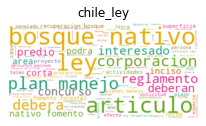

In [73]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['chile_ley']

# Create subplots for each doc
for index, name in enumerate(data.columns):
    wc.generate(data_clean.transcript[policy])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()